In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/heart.csv')

print("Missing values per column:\n", data.isnull().sum())

print("\nData description:\n", data.describe())

Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data description:
                age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025

In [2]:
X = data.drop(columns=['target'])
y = data['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

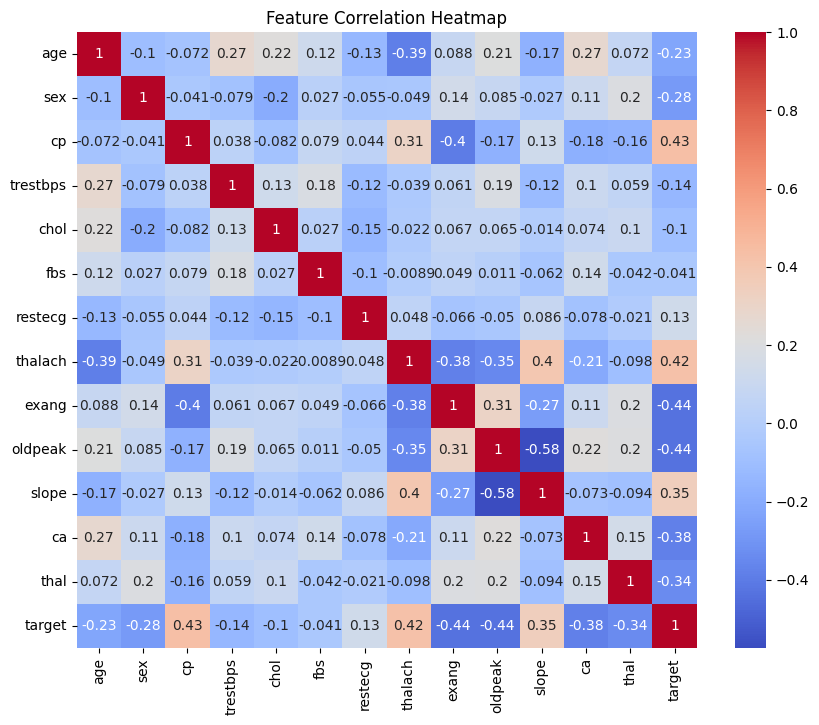

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

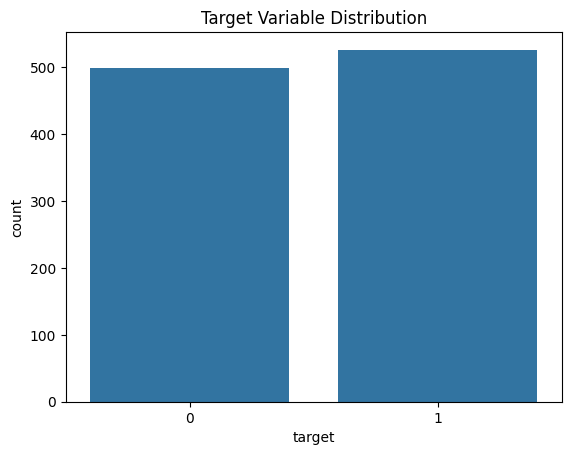

In [4]:
sns.countplot(x=y)
plt.title("Target Variable Distribution")
plt.show()

In [5]:
correlation_matrix = data.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix['target']) > 0.1]
print("\nHighly correlated features with target:\n", high_corr_features)


Highly correlated features with target:
 Index(['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [6]:
X_selected = data[high_corr_features].drop(columns=['target'])
X_selected_scaled = scaler.fit_transform(X_selected)

In [7]:
knn = KNeighborsClassifier()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(knn, X_selected_scaled, y, cv=kf, scoring='accuracy')
print("\nAccuracy scores across folds:", accuracy_scores)
print("Mean Accuracy:", np.mean(accuracy_scores))


Accuracy scores across folds: [0.83902439 0.90243902 0.86829268 0.84878049 0.87804878]
Mean Accuracy: 0.8673170731707318


In [8]:
precision_scores = cross_val_score(knn, X_selected_scaled, y, cv=kf, scoring='precision')
recall_scores = cross_val_score(knn, X_selected_scaled, y, cv=kf, scoring='recall')
f1_scores = cross_val_score(knn, X_selected_scaled, y, cv=kf, scoring='f1')


print("\nPrecision scores across folds:", precision_scores)
print("Mean Precision:", np.mean(precision_scores))

print("\nRecall scores across folds:", recall_scores)
print("Mean Recall:", np.mean(recall_scores))

print("\nF1 scores across folds:", f1_scores)
print("Mean F1 Score:", np.mean(f1_scores))


Precision scores across folds: [0.8125     0.92929293 0.89189189 0.81904762 0.87155963]
Mean Precision: 0.8648584146519926

Recall scores across folds: [0.88349515 0.87619048 0.86842105 0.87755102 0.89622642]
Mean Recall: 0.8803768219911252

F1 scores across folds: [0.84651163 0.90196078 0.88       0.84729064 0.88372093]
Mean F1 Score: 0.8718967965694698


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_scaled, y, test_size=0.2, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

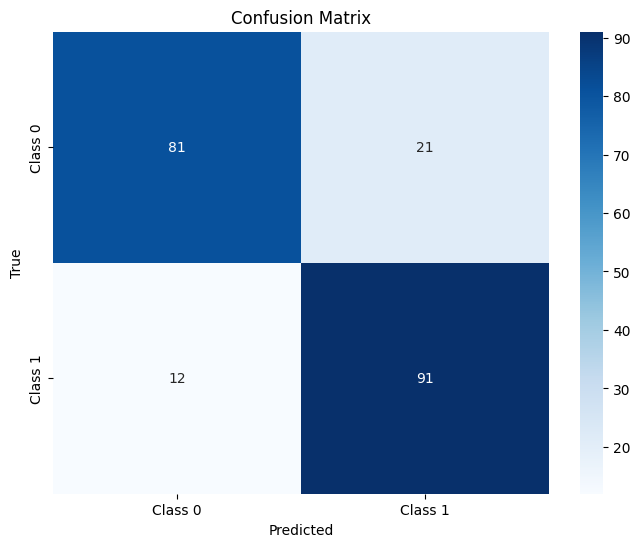

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [11]:
final_accuracy = accuracy_score(y_test, y_pred)
print("\nFinal Accuracy on Test Set:", final_accuracy)


Final Accuracy on Test Set: 0.8390243902439024
